In [ ]:
#The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10?
#Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
data= pd.read_csv('car_age_price.csv')

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [30]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [31]:
data.shape

(112, 2)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [33]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
#missing values

In [34]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
data.columns

Index(['Year', 'Price'], dtype='object')

<AxesSubplot:>

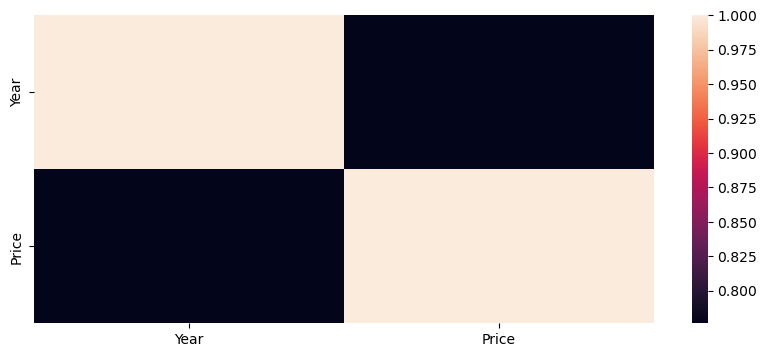

In [35]:
corrmatrix= data.corr() 
plt.subplots(figsize=(10,4)) 
sns.heatmap(corrmatrix)

<AxesSubplot:>

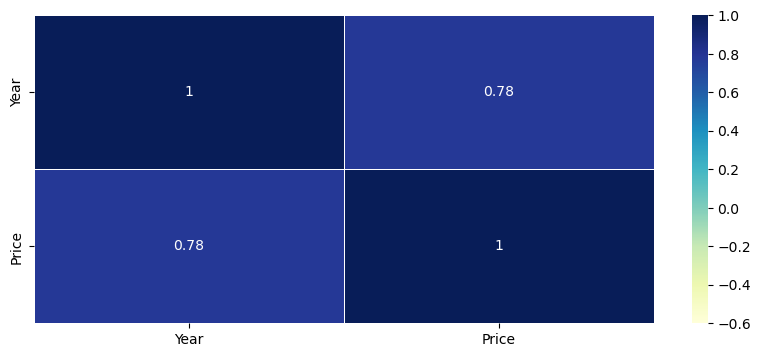

In [36]:
corrmatrix= data.corr() 
plt.subplots(figsize=(10,4)) 
sns.heatmap(corrmatrix, annot=True, vmin=-0.6, vmax=1, linewidth=0.4,cmap="YlGnBu")

In [37]:
data['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

In [38]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [39]:
y = data['Price'] 
x = data.drop(['Price'], axis=1)

In [16]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [40]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [41]:
#split the data for training and testing 


from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn import linear_model 
lr = linear_model.LinearRegression()

In [43]:
model = lr.fit(x_train, y_train)

In [45]:
y_pred = model.predict(x_test)

In [46]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [47]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [48]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [49]:
from sklearn.metrics import mean_squared_error 
print ('MSE =', mean_squared_error(y_test, y_pred))

MSE = 4326906256.829671


In [50]:
from sklearn.metrics import r2_score  
print ('r2_score  =', r2_score (y_test, y_pred))

r2_score  = 0.36759313425902185


normalization

In [51]:
from sklearn import preprocessing 
x1 = preprocessing.normalize(x)

In [34]:
x1

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [36]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [37]:
#split the data for training and testing 


from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [38]:
lr2 = linear_model.LinearRegression()
model2 = lr2.fit(x_train, y_train) 
y_pred2 = model2.predict(x_test)

In [39]:
print ('MSE =', mean_squared_error(y_test, y_pred2)) 

print ('r2_score =', r2_score (y_test, y_pred2))

MSE = 6858323319.553456
r2_score = -0.0023907377034257937


LASSO REGRESSION

In [48]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [49]:
data.shape

(112, 2)

In [50]:
data.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [53]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [54]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [56]:
data.nunique()

Year      8
Price    35
dtype: int64

In [57]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [58]:
y = data['Price'] 
x = data.drop(['Price'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train.shape

(89, 1)

In [61]:
y_train.shape

(89,)

In [11]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=1.0)

In [63]:
lasso.fit(x_train, y_train)

Lasso()

In [64]:
y_pred = lasso.predict(x_test)

In [65]:
y_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [4]:
x= data.loc[:, : "Price"] 
y=data["Year"]

In [54]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler() 
x = scaler.fit_transform(x)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [57]:
y_pred_lasso = np.round(np.clip(lasso.predict(x_test), 1, 10)).astype(int) 
np.round(1 - mean_squared_error(y_test, y_pred_lasso ) / y_test.std(), 2)

-2812393.95

In [66]:
print('Slope: %2f' % lasso.coef_[0])

Slope: 47608.155600


In [68]:
print('Intercept: %2f' % lasso.intercept_)

Intercept: -95520091.247918


In [69]:
from sklearn.metrics import mean_squared_error 
print ('MSE =', mean_squared_error(y_test, y_pred))

MSE = 4326859771.015669


In [70]:
from sklearn.metrics import r2_score  
print ('r2_score  =', r2_score (y_test, y_pred))

r2_score  = 0.3675999284778446
